In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bd3-image/Screenshot 2024-11-12 at 11.26.16PM.png
/kaggle/input/krish4-image/Screenshot 2024-11-12 at 11.02.13PM.png
/kaggle/input/image-2/Screenshot 2024-11-06 at 10.02.38AM.png
/kaggle/input/bd5-image/Screenshot 2024-11-12 at 11.33.19PM.png
/kaggle/input/bd6-image/Screenshot 2024-11-12 at 11.36.01PM.png
/kaggle/input/krish8-images/Screenshot 2024-11-12 at 11.18.07PM.png
/kaggle/input/bd2-image/Screenshot 2024-11-12 at 11.23.12PM.png
/kaggle/input/3x-image/Screenshot 2024-11-12 at 7.54.18PM.png
/kaggle/input/91image/Screenshot 2024-11-10 at 7.11.27PM.png
/kaggle/input/handwritten-math-symbols/dataset/.directory
/kaggle/input/handwritten-math-symbols/dataset/7/h2oADiw9.png
/kaggle/input/handwritten-math-symbols/dataset/7/i41zVQ0G.png
/kaggle/input/handwritten-math-symbols/dataset/7/JW2ti3bD.png
/kaggle/input/handwritten-math-symbols/dataset/7/2675.jpg
/kaggle/input/handwritten-math-symbols/dataset/7/96357.jpg
/kaggle/input/handwritten-math-symbols/dataset/7/25946.jpg
/kag

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import os
from os import listdir
from os.path import isfile, join

# CV and Image
import cv2
from PIL import Image

# pickle for object serialization
import pickle

# Keras imports
from keras import optimizers, backend as K
from keras.models import Model, Sequential, load_model
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical, plot_model  # Corrected import
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam

# Set Keras image data format
K.image_data_format()

# Your other code goes here...


'channels_last'

In [3]:
p = "/kaggle/input/handwritten-math-symbols/dataset"

print("These are the folders we'll be working with :")

for f in os.listdir(p):
    print(f)

These are the folders we'll be working with :
7
2
5
div
8
x
0
y
z
add
3
eq
dec
sub
1
4
9
mul
6
.directory


In [4]:
# Path to the main dataset directory
p = "/kaggle/input/handwritten-math-symbols/dataset"

print("These are the folders we'll be working with:")
for f in os.listdir(p):
    print(f)

def load_images(folder):
    train_data = []
    
    for filename in os.listdir(folder):
        if filename != ".directory":
            image = cv2.imread(os.path.join(folder, filename), cv2.IMREAD_GRAYSCALE)
            image = ~image  # Invert the image colors

            if image is not None:
                ret, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
                contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
                contour = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])

                maxi = 0
                for c in contour:
                    x, y, a, b = cv2.boundingRect(c)
                    maxi = max(a * b, maxi)
                    if maxi == a * b:
                        x_max, y_max, w_max, h_max = x, y, a, b

                im_crop = thresh[y_max:y_max + h_max + 10, x_max:x_max + w_max + 10]
                im_resize = cv2.resize(im_crop, (28, 28))
                im_resize = np.reshape(im_resize, (784, 1))
                train_data.append(im_resize)
            
    return train_data

# Adjust the path as needed to reference an existing subdirectory (e.g., '0')
subfolder = "0"  # Replace with the correct subfolder name
subfolder_path = os.path.join(p, subfolder)

# Verify if subfolder path exists
if os.path.exists(subfolder_path):
    data = load_images(subfolder_path)

    # Adding labels to the data (example label '0')
    for i in range(0, len(data)):
        data[i] = np.append(data[i], ['0'])

    print(f"Number of images loaded: {len(data)}")
else:
    print(f"Subfolder path '{subfolder_path}' does not exist. Check the directory structure.")


These are the folders we'll be working with:
7
2
5
div
8
x
0
y
z
add
3
eq
dec
sub
1
4
9
mul
6
.directory
Number of images loaded: 595


In [5]:
iter = 0

for i in list(os.listdir(p)):
    if i not in ["0", ".directory"]:
        print("Iter:", iter)
        print("Working with the", i, "folder")

        # Correctly join the main path and subfolder
        folder_path = os.path.join(p, i)
        data_i = load_images(folder_path)

        if i in [str(k) for k in range(1, 10)]:
            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], [i])

        if i == "add":
            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["10"])

        if i == "sub":
            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["11"])

        if i == "mul":
            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["12"])

        if i == "div":
            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["13"])

        if i == "eq":
            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["14"])

        if i == "dec":
            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["15"])

        if i == "x":
            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["16"])

        if i == "y":
            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["17"])

        if i == "z":
            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["18"])

        # Ensure that 'data' exists before concatenation
        if iter == 0:
            data = np.array(data_i)
        else:
            data = np.concatenate((data, data_i))
        
        print(len(data))
        print()

        iter += 1


Iter: 0
Working with the 7 folder
533

Iter: 1
Working with the 2 folder
966

Iter: 2
Working with the 5 folder
1399

Iter: 3
Working with the div folder
2017

Iter: 4
Working with the 8 folder
2571

Iter: 5
Working with the x folder
3023

Iter: 6
Working with the y folder
3422

Iter: 7
Working with the z folder
3634

Iter: 8
Working with the add folder
4230

Iter: 9
Working with the 3 folder
4771

Iter: 10
Working with the eq folder
5405

Iter: 11
Working with the dec folder
6029

Iter: 12
Working with the sub folder
6684

Iter: 13
Working with the 1 folder
7246

Iter: 14
Working with the 4 folder
7772

Iter: 15
Working with the 9 folder
8318

Iter: 16
Working with the mul folder
8895

Iter: 17
Working with the 6 folder
9476



In [6]:
df=pd.DataFrame(data,index=None)
df.to_csv('train_handwritten.csv',index=False)

data = pd.read_csv('train_handwritten.csv',index_col=False)
labels = data[['784']]

data.drop(data.columns[[784]],axis=1,inplace=True)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,255,255,255,255,196,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,255,255,255,255,255,255,235,...,0,0,0,0,0,0,0,0,0,0
2,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,9,9,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
4,0,0,20,91,91,103,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0


In [7]:
np.random.seed(1212)
labels=np.array(labels)
cat=to_categorical(labels,num_classes=19)
cat[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [8]:
temp=data.to_numpy()
X_train = temp.reshape(temp.shape[0], 28, 28, 1)
X_train.shape

(9476, 28, 28, 1)

In [9]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28, 28, 1), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(19, activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 12, 12, 15)     │         4,335 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 15)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6, 6, 15)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 540)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        69,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         6,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 19)             │           969 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,322 (317.66 KB)

 Trainable params: 81,322 (317.66 KB)

 Non-trainable params: 0 (0.00 B)

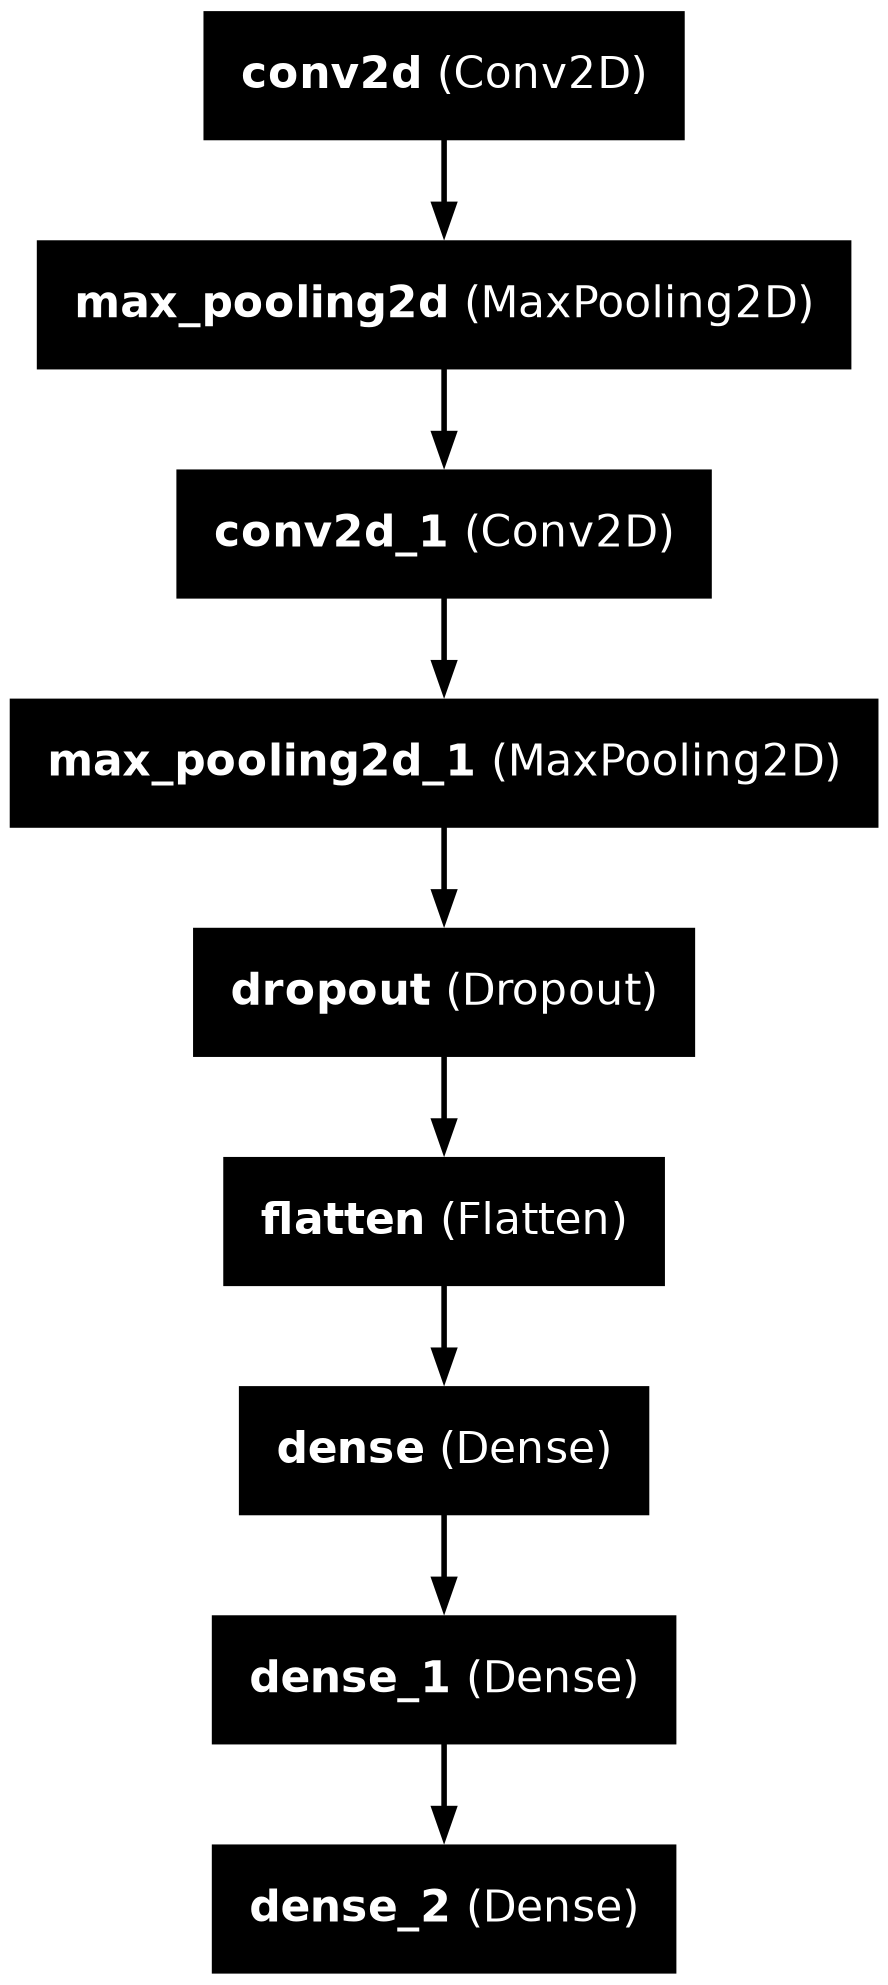

In [11]:
plot_model(model, show_layer_names=True)

In [12]:
# plt.plot(nn['loss'])
# plt.plot(nn['accuracy'])
# plt.title('model loss')
# plt.ylabel('loss and accuracy')
# plt.xlabel('epoch')
# plt.legend(['train_loss', 'train_accuracy'], loc='upper right')

In [13]:
!pip install imutils

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


  Preparing metadata (setup.py) ... done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25837 sha256=082051553f6dff5c41e4f5ae7783b72be347f5b6c5db49100ef3588a7890b370
  Stored in directory: /root/.cache/pip/wheels/85/cf/3a/e265e975a1e7c7e54eb3692d6aa4e2e7d6a3945d29da46f2d7
Successfully built imutils


In [14]:
# Update ModelCheckpoint to save weights only
checkpoint = ModelCheckpoint("eq_solver.weights.h5", monitor='accuracy', verbose=1, save_best_only=True, save_weights_only=True)

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model
nn = model.fit(X_train, cat, epochs=100, batch_size=256, shuffle=True, verbose=1, callbacks=[checkpoint]).history

# Save the full model to an .h5 file after training
model.save("eq_solver_full_model.h5")


Epoch 1/100


I0000 00:00:1731493520.251946      85 service.cc:145] XLA service 0x7912c4007f60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731493520.252007      85 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1731493520.252013      85 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


31/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1086 - loss: 19.6855

I0000 00:00:1731493526.548048      85 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.1186 - loss: 17.4881
Epoch 1: accuracy improved from -inf to 0.16906, saving model to eq_solver.weights.h5
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 79ms/step - accuracy: 0.1199 - loss: 17.2301
Epoch 2/100
27/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3158 - loss: 2.1649
Epoch 2: accuracy improved from 0.16906 to 0.39679, saving model to eq_solver.weights.h5
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3366 - loss: 2.0989
Epoch 3/100
26/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5701 - loss: 1.3732
Epoch 3: accuracy improved from 0.39679 to 0.60954, saving model to eq_solver.weights.h5
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5800 - loss: 1.3409
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6870 - loss: 0.9700
Epoch 4: accuracy improved from 0.60954 to 0.71370, saving model to eq_solver.weights.h5
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6876 - loss: 0.9679
Epoch 5/100
26/38 ━━━━

In [15]:
import shutil

# Move the weights file saved by ModelCheckpoint to the '/kaggle/working' directory
shutil.move('eq_solver.weights.h5', '/kaggle/working/eq_solver.weights.h5')


'/kaggle/working/eq_solver.weights.h5'

In [21]:
model = load_model("/kaggle/working/eq_solver_full_model.h5")

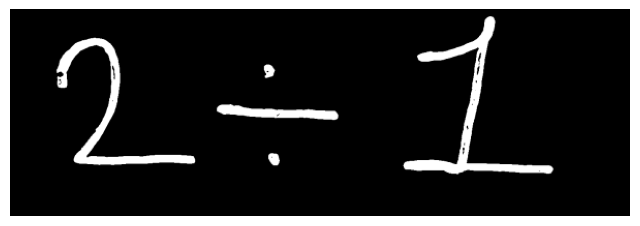

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the path of the image
img_path = '/kaggle/input/bd2-image/Screenshot 2024-11-12 at 11.23.12PM.png'

# Load the image from the file path in grayscale
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Process the loaded image
if img is not None:
    # Step 1: Invert the image so symbols are dark and background is white
    img_inverted = cv2.bitwise_not(img)

    # Step 2: Apply a binary threshold to make the background white and symbols black
    _, img_thresh = cv2.threshold(img_inverted, 150, 255, cv2.THRESH_BINARY)

    # Step 3: Denoise the image using Non-Local Means Denoising
    img_denoised = cv2.fastNlMeansDenoising(img_thresh, None, 30, 7, 21)

    # Step 4: Sharpen the image to remove blurriness (using a stronger kernel)
    kernel = np.array([[-1, -1, -1], [-1,  9, -1], [-1, -1, -1]])  # Sharpening kernel
    img_sharp = cv2.filter2D(img_denoised, -1, kernel)

    # Step 5: Increase contrast (optional, to make the symbols more distinct)
    img_sharp = cv2.convertScaleAbs(img_sharp, alpha=1.5, beta=0)  # Increase contrast

    # Step 6: Resize the image to improve readability (optional)
    img_resized = cv2.resize(img_sharp, (600, 200), interpolation=cv2.INTER_AREA)

    # Display the processed image with a white background and clear symbols
    plt.figure(figsize=(8, 6))
    plt.imshow(img_resized, cmap='gray')
    plt.axis('off')  # Hide the axes
    plt.show()
else:
    print("Failed to load the image from the provided path.")


Number of symbols detected: 7


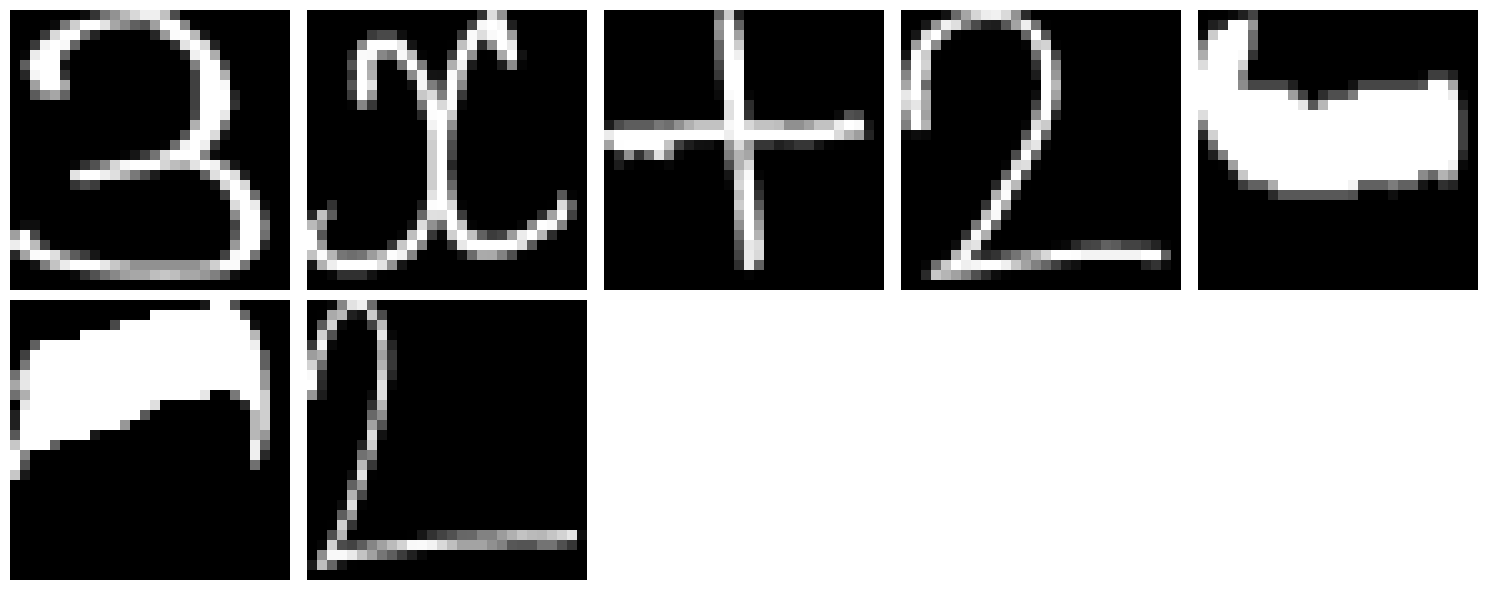

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Your Equation: 3x+2=2


In [23]:
# final one

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the path of the image
img_path = '/kaggle/input/krish3-image/Screenshot 2024-11-12 at 10.58.29PM.png'

# Load and preprocess the image
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

if img is not None:
    # Invert the image so that the background is white and symbols are black
    img = cv2.bitwise_not(img)

    # Apply binary threshold to enhance contrast between background and symbols
    _, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

    # Find contours of symbols
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    # Sort contours from left to right
    contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])

    train_data = []
    rects = []

    # Extract bounding boxes for each contour
    for c in contours:
        x, y, w, h = cv2.boundingRect(c)
        rect = [x, y, w, h]
        rects.append(rect)

    # Remove overlapping rectangles (to avoid duplicate symbol extraction)
    bool_rect = []
    for r in rects:
        overlap_flags = []
        for rec in rects:
            flag = 0
            if rec != r:
                # Check for overlap between bounding boxes
                if (r[0] < rec[0] + rec[2] + 10 and rec[0] < r[0] + r[2] + 10 and 
                    r[1] < rec[1] + rec[3] + 10 and rec[1] < r[1] + r[3] + 10):
                    flag = 1
            overlap_flags.append(flag)
        bool_rect.append(overlap_flags)

    # Filter out overlapping rectangles
    dump_rect = []
    for i in range(len(contours)):
        for j in range(len(contours)):
            if bool_rect[i][j] == 1:
                area1 = rects[i][2] * rects[i][3]
                area2 = rects[j][2] * rects[j][3]
                # Keep only the larger rectangle in case of overlap
                if area1 == min(area1, area2):
                    dump_rect.append(rects[i])

    # Final list of bounding boxes after removing overlaps
    final_rects = [i for i in rects if i not in dump_rect]

    # Display the number of final contours (symbols)
    print(f"Number of symbols detected: {len(final_rects)}")

    # Crop, resize, and store each symbol as training data
    for r in final_rects:
        x, y, w, h = r
        # Crop each symbol with padding for clarity
        padding = 10
        im_crop = thresh[y:y+h+padding, x:x+w+padding]
        # Resize to 28x28 pixels for model input
        im_resized = cv2.resize(im_crop, (28, 28), interpolation=cv2.INTER_AREA)
        im_resized = np.reshape(im_resized, (28, 28, 1))  # Add channel dimension
        train_data.append(im_resized)

    # Display the extracted and resized symbols (optional)
    n = len(train_data)
    cols = 5  # You can change this to adjust number of columns
    rows = (n // cols) + (1 if n % cols > 0 else 0)  # Calculate rows required for symbols

    # Create subplots for displaying symbols centered
    fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 3))
    axes = axes.flatten()  # Flatten axes for easy iteration

    for i, symbol in enumerate(train_data):
        ax = axes[i]
        ax.imshow(symbol.squeeze(), cmap='gray')
        ax.axis('off')  # Hide axis
        ax.set_aspect('equal')  # Maintain aspect ratio to prevent distortion

    # Turn off axes for unused subplots
    for i in range(len(train_data), len(axes)):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

else:
    print("Failed to load the image from the provided path.")

# Equation string for storing recognized symbols
equation = ''

# Iterate through each symbol to predict its label
for i in range(len(train_data)):
    train_data[i] = np.array(train_data[i])
    train_data[i] = train_data[i].reshape(1, 28, 28, 1)
    result = np.argmax(model.predict(train_data[i]), axis=-1)
    
    # Map prediction result to the corresponding symbol or digit
    symbol = ""
    if result[0] in range(10):  # digits 0-9
        symbol = str(result[0])
    elif result[0] == 10:
        symbol = "+"
    elif result[0] == 11:
        symbol = "-"
    elif result[0] == 12:
        symbol = "*"
    elif result[0] == 13:
        symbol = "/"
    elif result[0] == 14:
        symbol = "="
    elif result[0] == 15:
        symbol = "."
    elif result[0] == 16:
        symbol = "x"
    elif result[0] == 17:
        symbol = "y"      
    elif result[0] == 18:
        symbol = "z"
    
    # Prevent addition of duplicate symbols after variables like x, y, z
    if symbol.isdigit() and len(equation) > 0 and equation[-1] in "xyz":
        continue  
    
    equation += symbol

# Replace '--' with '=' and '.-' with '=' in the final equation
equation = equation.replace('--', '=')
equation = equation.replace('.-', '=')
equation = equation.replace('=/','=')
equation = equation.replace('==','=')
equation = equation.replace('=..','/')
equation = equation.replace('-=','=')


print("Your Equation:", equation)

In [24]:
import sympy as sp
import re

def preprocess_equation(equation):
    equation = re.sub(r"([+\-*/=])", r" \1 ", equation)
    equation = re.sub(r"(\d)([xyz])", r"\1 * \2", equation)
    
    # Clean up redundant symbols and spaces
    equation = equation.replace("= =", "=").replace("==", "=").strip()
    return equation

def solve_extracted_equation(equation):
    try:
        x, y, z = sp.symbols('x y z')
        equation = preprocess_equation(equation)
        if '=' not in equation:
            expr = sp.sympify(equation)
            eq = sp.Eq(expr, 0)
            solutions = sp.solve(eq, x)
            return solutions
        else:
            lhs, rhs = equation.split('=')
            lhs = sp.sympify(lhs.strip())
            rhs = sp.sympify(rhs.strip())
            eq = sp.Eq(lhs, rhs)
            solutions = sp.solve(eq, x)
            return solutions

    except Exception as e:
        return f"Error processing equation: {e}"

solution = solve_extracted_equation(equation)
print("Processed Equation:", preprocess_equation(equation))
print("Solution:", solution)


Processed Equation: 3 * x + 2 = 2
Solution: [0]


In [20]:
# equation = ''

# # Iterate through each symbol to predict its label
# for i in range(len(train_data)):
#     train_data[i] = np.array(train_data[i])
#     train_data[i] = train_data[i].reshape(1, 28, 28, 1)
#     result = np.argmax(model.predict(train_data[i]), axis=-1)
    
#     # Map prediction result to the corresponding symbol or digit
#     # symbol = ""
#     if result[0] in range(10):  # digits 0-9
#         symbol = str(result[0])
#     elif result[0] == 10:
#         symbol = "+"
#     elif result[0] == 11:
#         symbol = "-"
#     elif result[0] == 12:
#         symbol = "*"
#     elif result[0] == 13:
#         symbol = "/"
#     elif result[0] == 14:
#         symbol = "="
#     elif result[0] == 15:
#         symbol = "."
#     elif result[0] == 16:
#         symbol = "x"
#     elif result[0] == 17:
#         symbol = "y"      
#     elif result[0] == 18:
#         symbol = "z"
    
#     # Prevent addition of duplicate symbols after variables like x, y, z
#     if symbol.isdigit() and len(equation) > 0 and equation[-1] in "xyz":
#         continue  
    
#     equation += symbol

# # Replace '--' with '=' and '.-' with '=' in the final equation
# equation = equation.replace('--', '=')
# equation = equation.replace('.-', '=')

# print("Your Equation:", equation)